In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib inline

In [ ]:
stations = ['Karpos', 'Centar', 'GaziBaba', 'Lisice', 'Rektorat', 'Miladinovci']
pollutants = ['PM10', 'PM25']

In [ ]:
df = pd.read_csv('./combined_data/Karpos.csv', index_col=0)
df.describe()

,relative_humidity,wind_speed,visibility,sea_level_pressure,pressure,dew_point,snow,uv_index,solar_radiation,wind_direction,apparent_temperature,temperature,precipitation,cloud_coverage,hour,day,month,year,weekend,holiday,PM10,PM25,NO2,SO2
count,17894.000000,17905.000000,17905.000000,17894.000000,17888.000000,17894.000000,17892.000000,17905.000000,17905.000000,17894.000000,17892.000000,17892.000000,17905.000000,17905.000000,17905.000000,17905.000000,17905.000000,17905.000000,17905.000000,17905.00000,14579.000000,17261.000000,8212.000000,15576.000000
mean,67.057226,3.704588,3.075258,1016.798246,982.914574,6.220241,0.091655,1.941391,184.064329,161.957863,12.635765,13.638034,0.056600,42.771628,11.499358,15.583748,6.409048,2019.530801,0.067020,0.03351,48.574149,32.573449,14.143842,1.087316
std,20.257115,1.938628,1.946637,7.010144,7.067326,6.969517,3.088320,2.606793,271.856634,116.906612,10.452693,9.305606,0.439378,39.545153,6.922720,8.804153,3.501597,0.537847,0.250064,0.17997,46.896826,30.533557,10.084651,1.034625
min,13.000000,0.000000,0.500000,993.500000,957.200000,-14.300000,0.000000,0.000000,0.000000,0.000000,-17.800000,-11.300000,0.000000,0.000000,0.000000,1.000000,1.000000,2019.000000,0.000000,0.00000,1.125700,0.013200,0.000000,0.002100
25%,51.000000,2.400000,1.500000,1012.000000,978.000000,1.000000,0.000000,0.000000,0.000000,40.000000,4.100000,6.200000,0.000000,2.000000,5.000000,8.000000,3.000000,2019.000000,0.000000,0.00000,20.939500,15.748900,6.975525,0.503775
50%,70.000000,3.600000,1.500000,1016.000000,982.500000,6.700000,0.000000,0.000000,0.173000,160.000000,13.200000,13.200000,0.000000,33.000000,11.000000,15.000000,6.000000,2020.000000,0.000000,0.00000,32.924301,24.163200,11.097600,0.785300
75%,84.000000,4.800000,5.000000,1021.000000,987.700000,11.800000,0.000000,3.200000,307.141000,263.000000,20.200000,20.400000,0.000000,88.000000,17.000000,23.000000,9.000000,2020.000000,0.000000,0.00000,57.739799,36.768700,18.422750,1.299075
max,106.000000,14.000000,5.000000,1046.900000,1030.000000,20.900000,255.000000,10.500000,983.745000,360.000000,46.400000,39.700000,21.600000,100.000000,23.000000,31.000000,12.000000,2021.000000,1.000000,1.00000,610.442017,448.653992,84.957199,20.288700


**Plotting the pollutants**

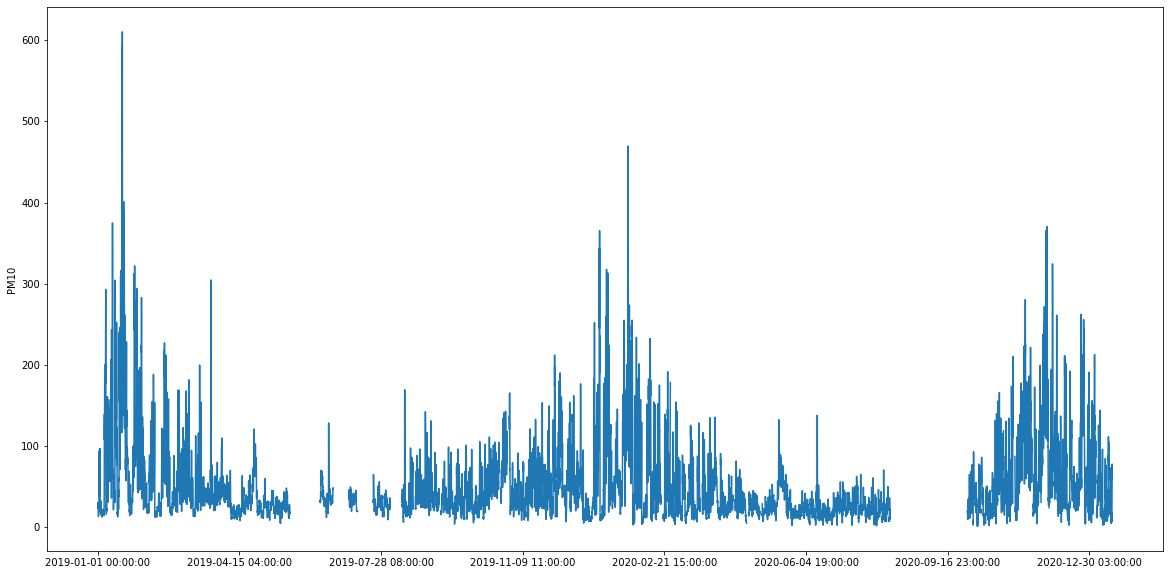

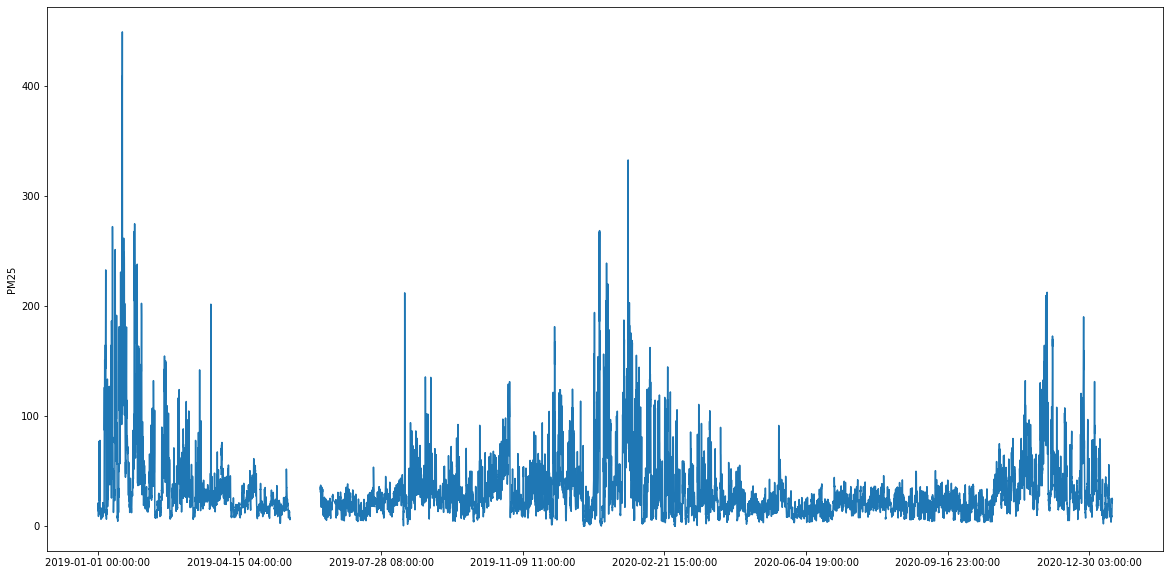

In [ ]:
for pollutant in pollutants:
  plt.figure(figsize=(20, 10))
  ax = df[pollutant].plot()
  ax.set_xlabel('')
  ax.set_ylabel(pollutant)
  plt.show()

**Correlation matrix for the numerical features of the dataset**

In [ ]:
numerical_features = ['PM10', 'PM25', 'relative_humidity', 'wind_speed', 'visibility', 'sea_level_pressure', 'pressure',
                      'dew_point', 'snow', 'uv_index', 'solar_radiation', 'wind_direction', 'apparent_temperature',
                      'temperature', 'precipitation', 'cloud_coverage']

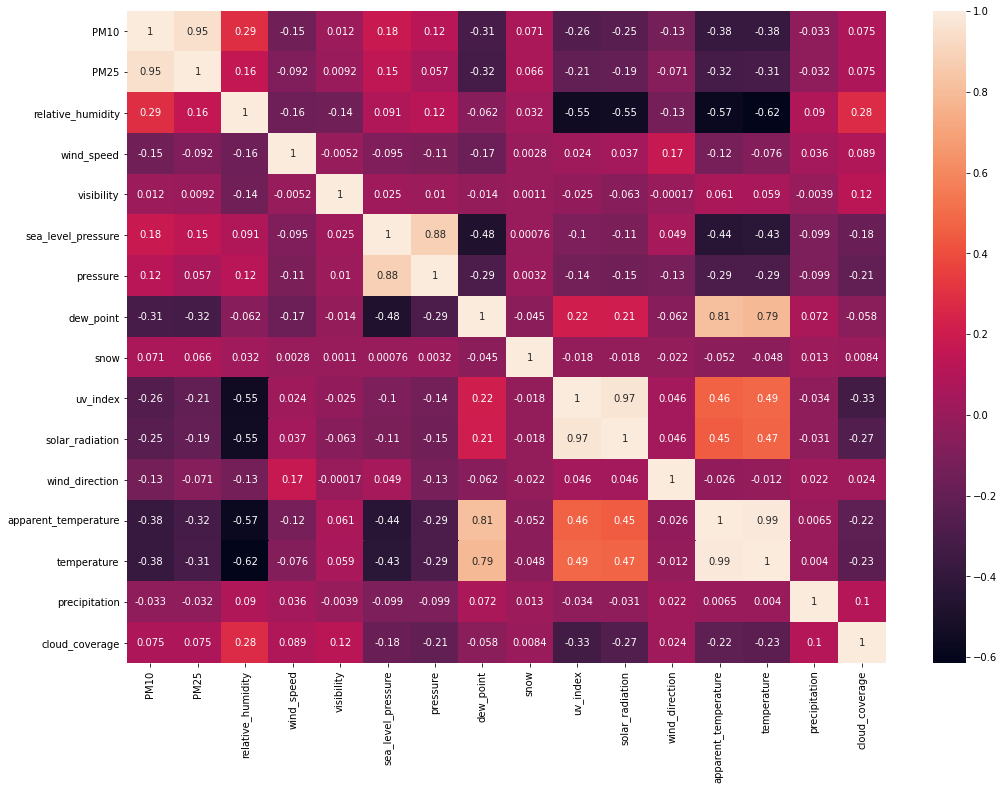

In [ ]:
df_numerical_features = df[numerical_features]
correlation_matrix = df_numerical_features.corr()
plt.figure(figsize=(17, 12))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Temperature and apparent temperature (as well as dew point), pressure and sea level pressure, UV index and solar radiation are highly correlated, so we will discard one of the values from the corresponding pairs. 

In [ ]:
df.index = pd.to_datetime(df.index)

**Exploring the impact of the categorical features i.e. time features like hour, day, month, weekend and holiday on the pollutants' concentration**

In [ ]:
def get_season(day_of_year):
  if day_of_year in range(80, 173):
    return 'Spring'
  elif day_of_year in range(173, 266):
    return 'Summer'
  elif day_of_year in range(266, 356):
    return 'Autumn'
  else:
    return 'Winter'

In [ ]:
step = 3
periods = {t: f'{hour}-{(hour+step)%24}' for hour in range (0, 24, step) for t in range(hour, hour+step)}

weekday = [date.strftime('%a') for date in df.index]
hour_of_day = [date.hour for date in df.index]
period_of_day = [periods[h] for h in hour_of_day]
month = [date.strftime('%b') for date in df.index]
season = [get_season(date.timetuple().tm_yday) for date in df.index]
year = [date.year for date in df.index]

df['weekday'] = pd.Series(weekday, index=df.index)
df['hour_of_day'] = pd.Series(hour_of_day, index=df.index)
df['period_of_day'] = pd.Series(period_of_day, index=df.index)
df['month'] = pd.Series(month, index=df.index)
df['season'] = pd.Series(season, index=df.index)
df['year'] = pd.Series(year, index=df.index)

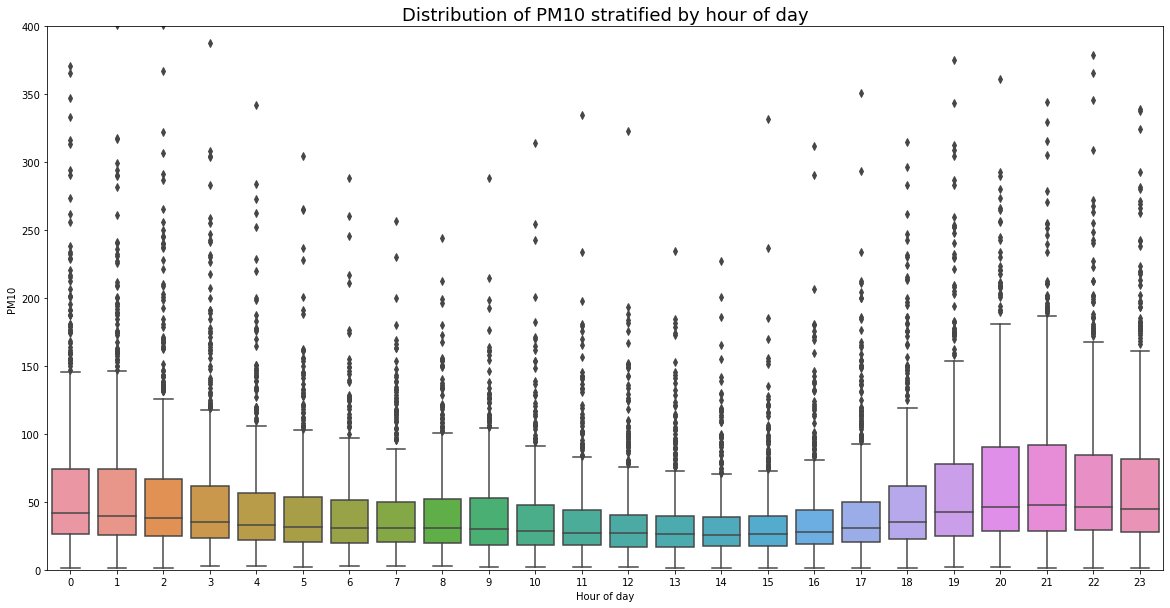

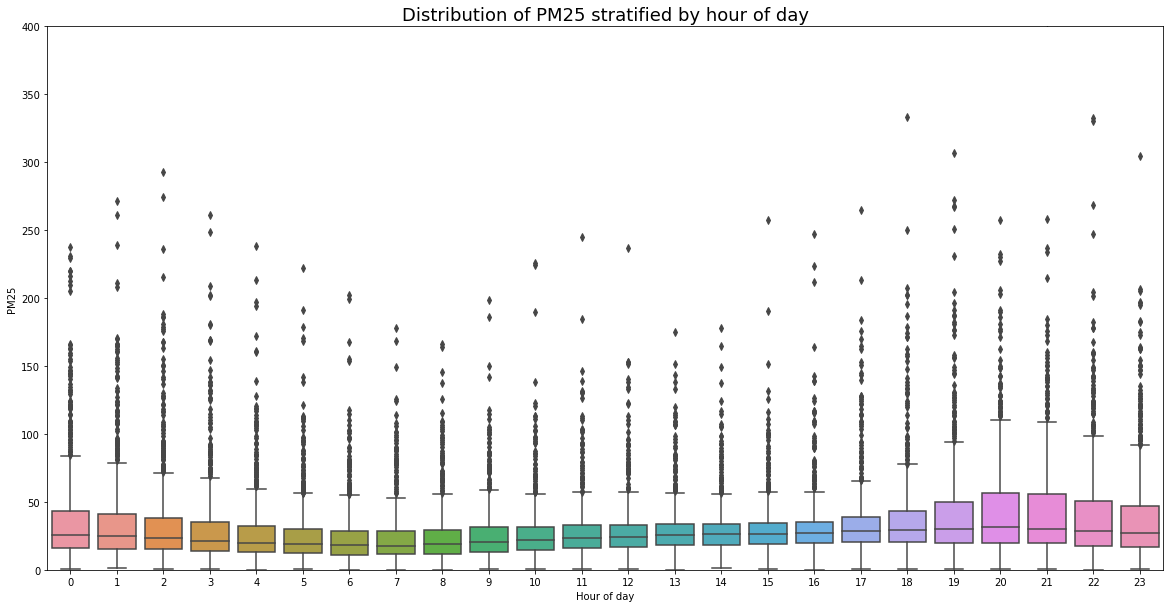

In [ ]:
for pollutant in pollutants:
  plt.figure(figsize=(20, 10))
  ax = sns.boxplot(x='hour_of_day', y=pollutant, data=df)
  ax.set(ylim=(0, 400), xlabel='Hour of day')
  ax.set_title(f"Distribution of {pollutant} stratified by hour of day", fontsize=18)
  plt.show()

As can be seen from the boxplots, the pollution is greater in the evening and at night (time period from 19h to 1h).

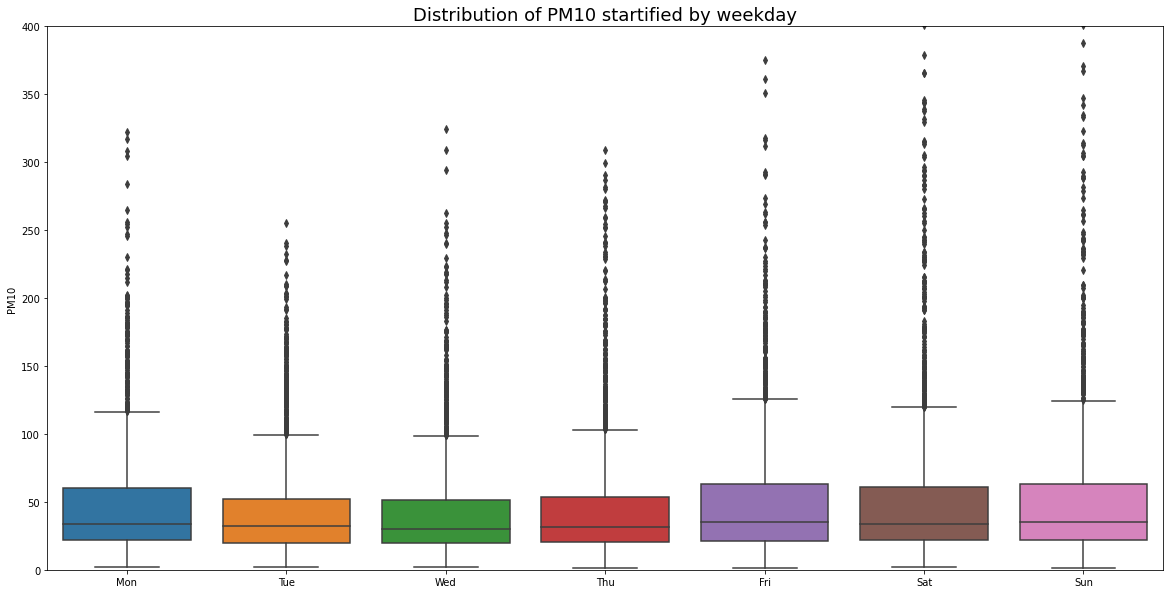

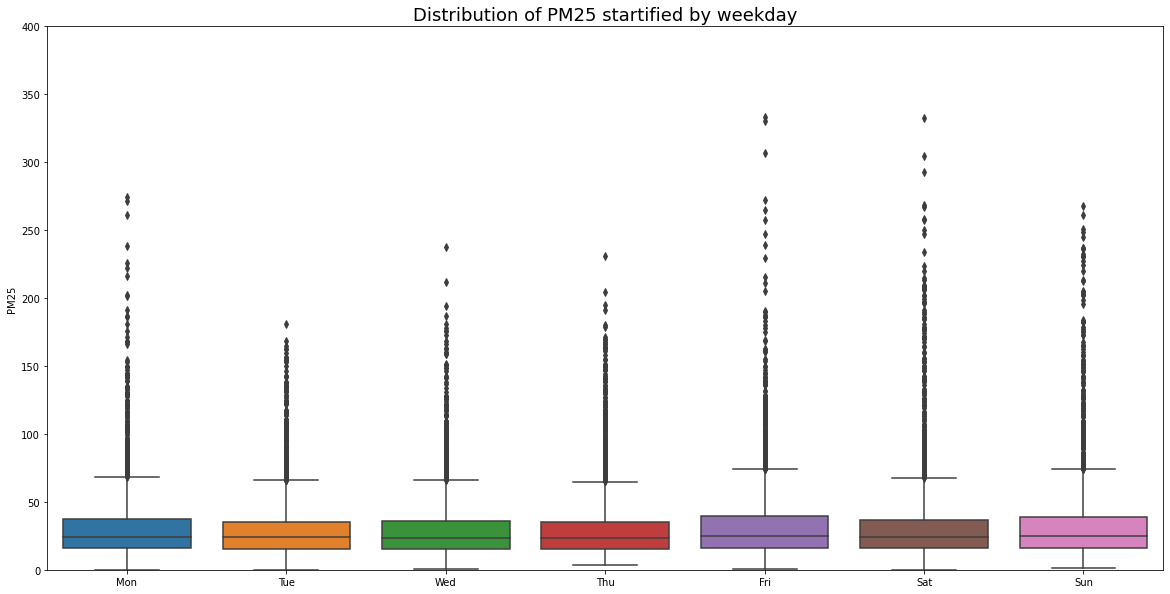

In [ ]:
for pollutant in pollutants:
  plt.figure(figsize=(20, 10))
  ax = sns.boxplot(x='weekday', y=pollutant, data=df,
                   order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
  ax.set(ylim=(0, 400), xlabel='')
  ax.set_title(f"Distribution of {pollutant} stratified by weekday", fontsize=18)
  plt.show()

It can be seen that there is no significant difference in pollution between different days of the week. However, it can be observed that the pollution is higher in the period from Friday to Monday.

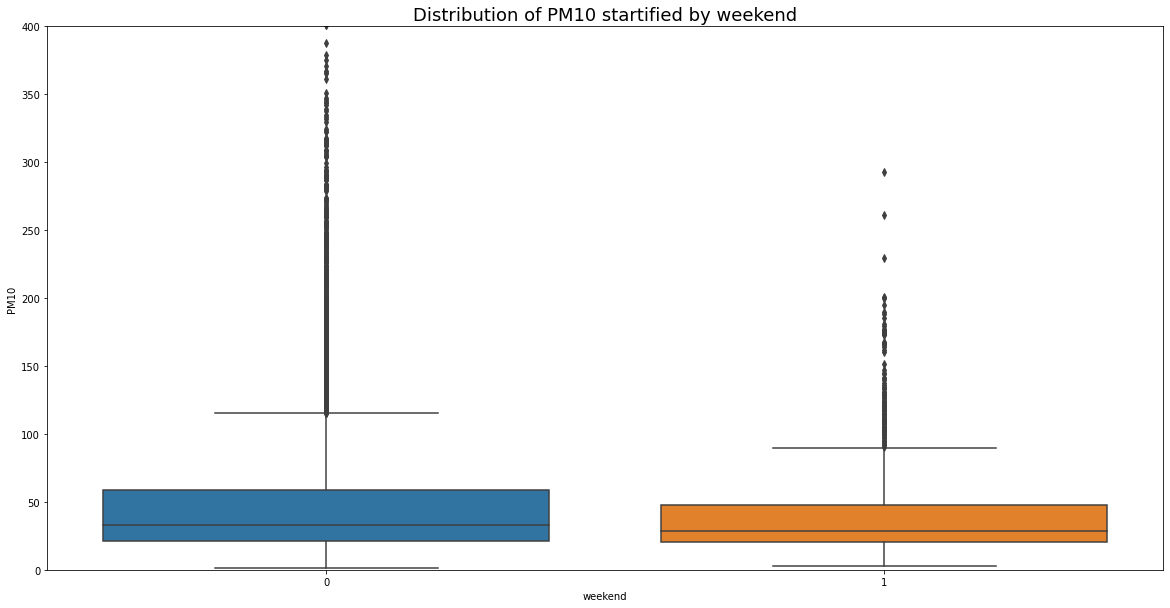

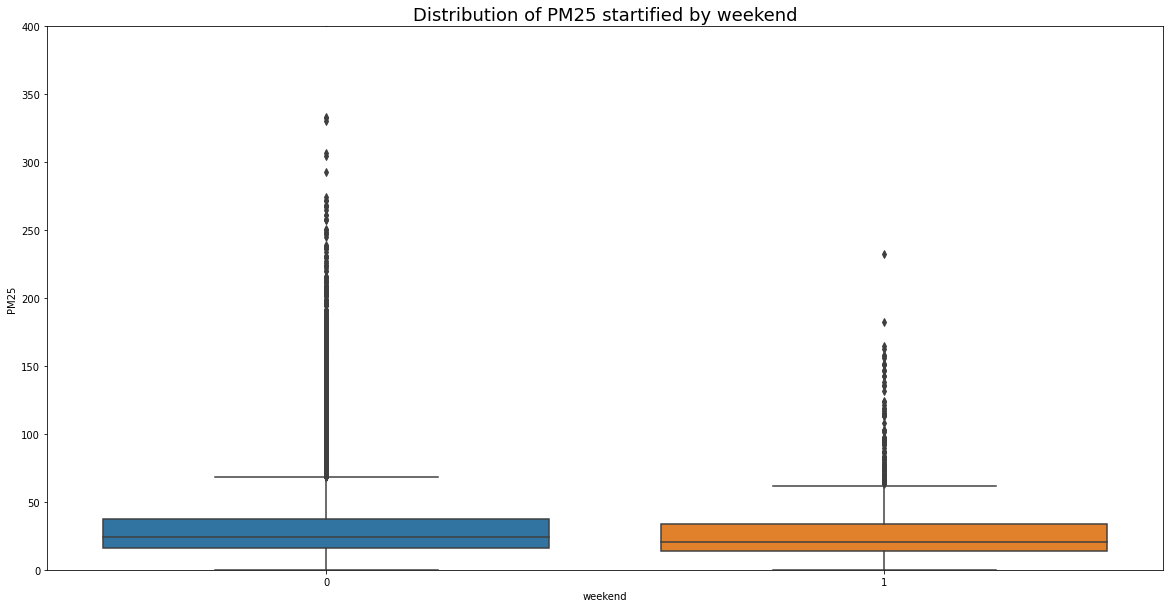

In [ ]:
for pollutant in pollutants:
  plt.figure(figsize=(20, 10))
  ax = sns.boxplot(x='weekend', y=pollutant, data=df)
  ax.set(ylim=(0, 400))
  ax.set_title(f"Distribution of {pollutant} stratified by weekend", fontsize=18)
  plt.show()

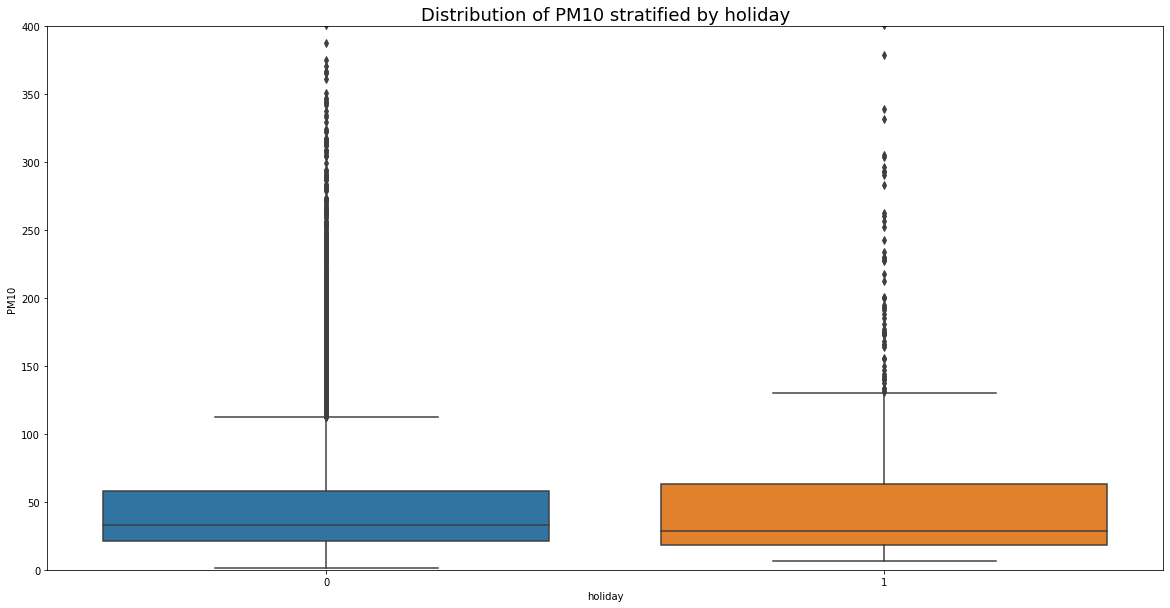

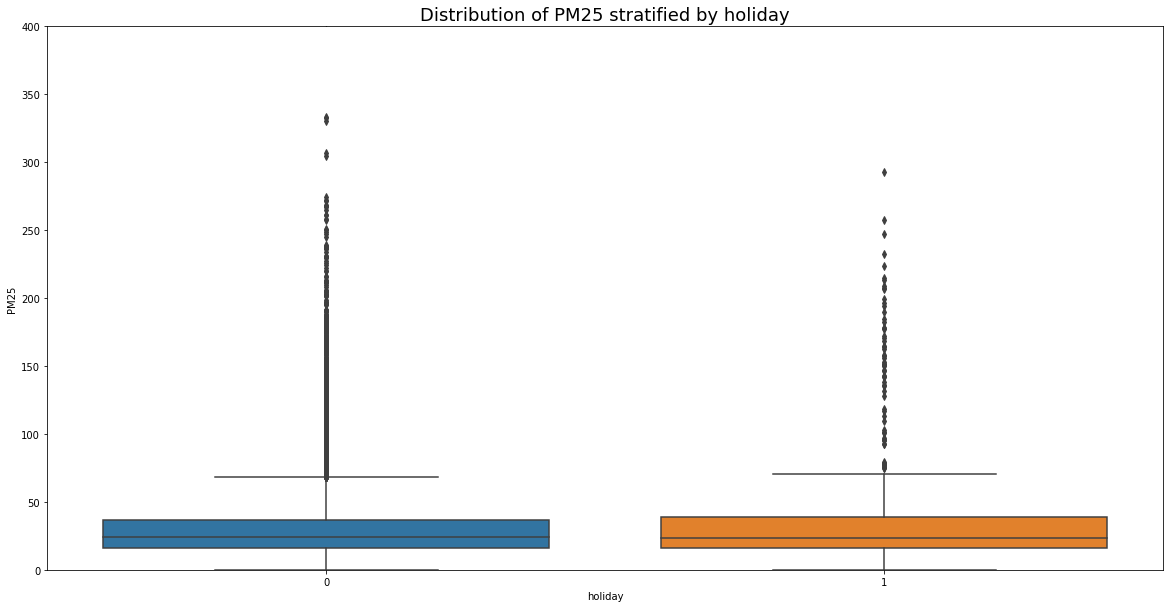

In [ ]:
for pollutant in pollutants:
  plt.figure(figsize=(20, 10))
  ax = sns.boxplot(x='holiday', y=pollutant, data=df)
  ax.set(ylim=(0, 400))
  ax.set_title(f"Distribution of {pollutant} stratified by holiday", fontsize=18)
  plt.show()

We notice that the pollution is higher during the holidays, but this can be biased by the sample size in which the day is a holiday (most of the holidays are in the winter months, when pollution is at highest).

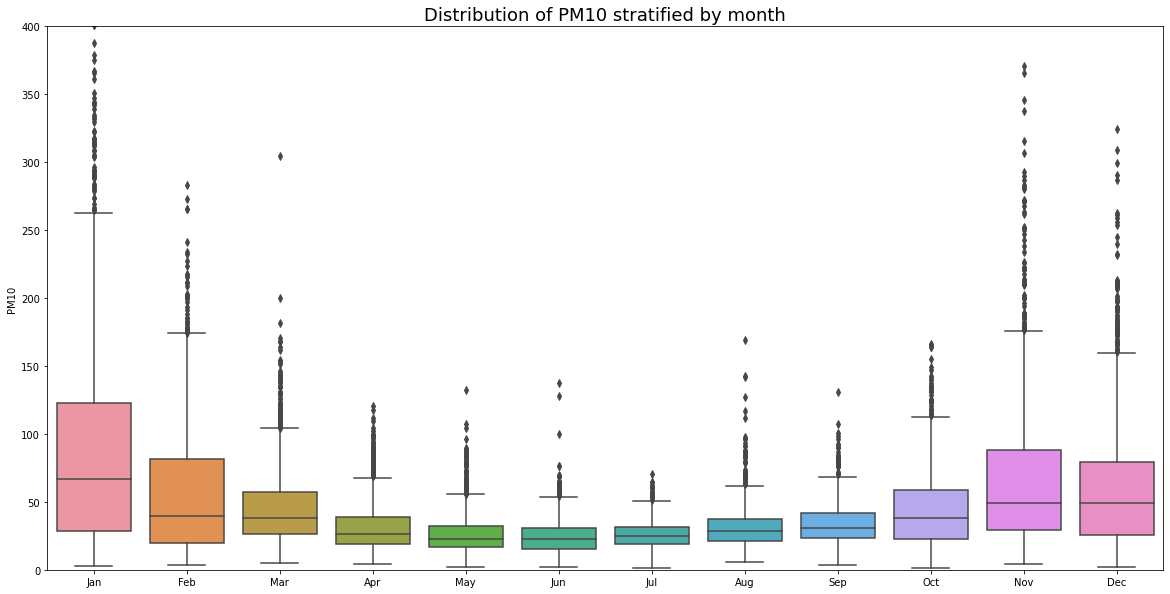

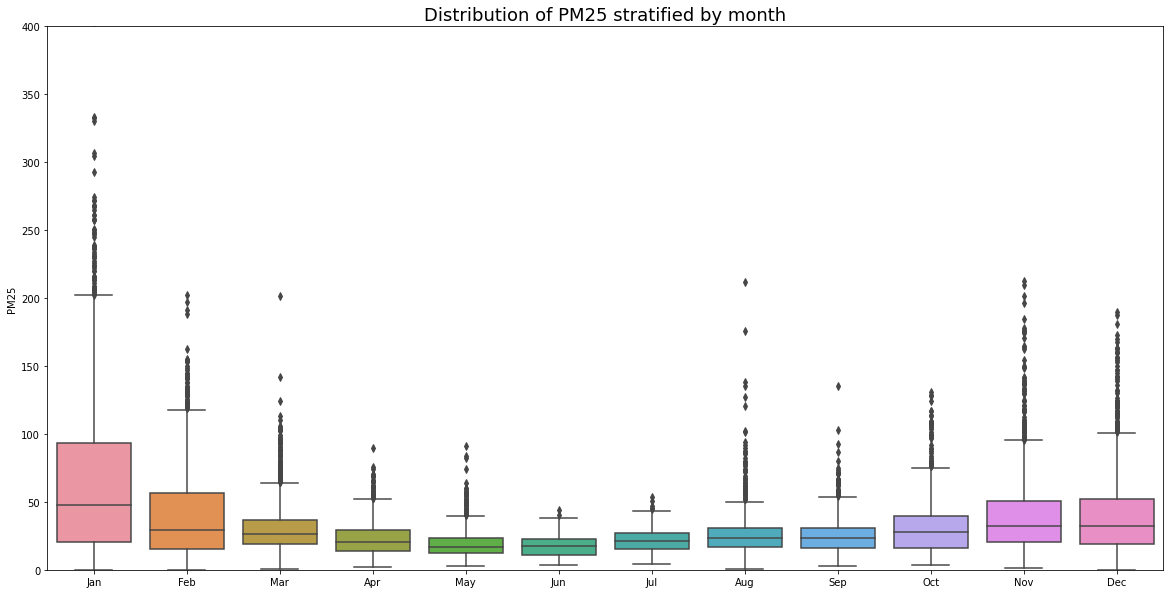

In [ ]:
for pollutant in pollutants:
  plt.figure(figsize=(20, 10))
  ax = sns.boxplot(x='month', y=pollutant, data=df,
                   order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
  ax.set(ylim=(0, 400))
  ax.set(xlabel='')
  ax.set_title(f"Distribution of {pollutant} stratified by month", fontsize=18)
  plt.show()

From the boxplots above, we can conclude that the pollution is highest during the autumn and winter months i.e. from October to March and lowest during the spring and summer - April to September.

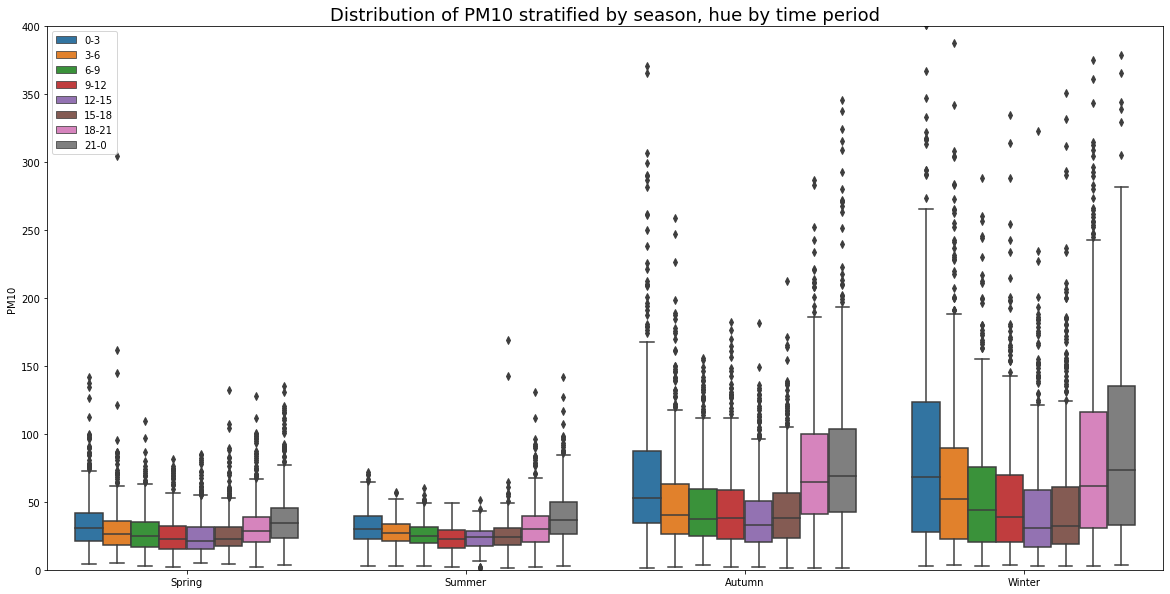

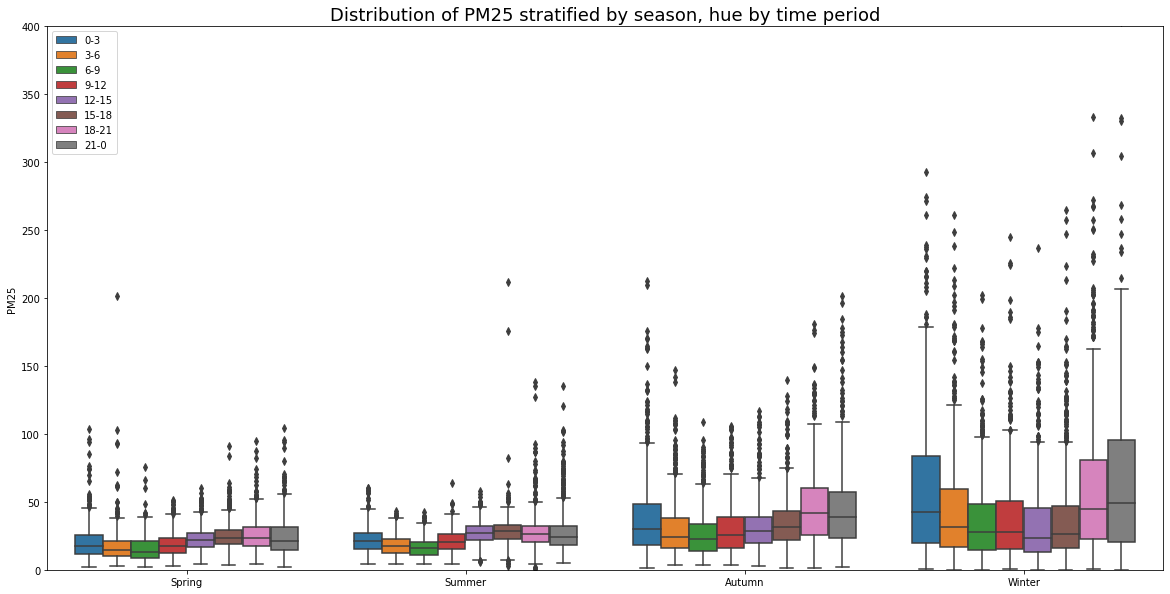

In [ ]:
for pollutant in pollutants:
  plt.figure(figsize=(20, 10))
  ax = sns.boxplot(x='season', y=pollutant, hue='period_of_day', data=df,
                   order=['Spring', 'Summer', 'Autumn', 'Winter'],
                   hue_order=['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-0'])
  ax.set(ylim=(0, 400), xlabel='')
  ax.set_title(f"Distribution of {pollutant} stratified by season, hue by time period", fontsize=18)
  plt.legend(loc="upper left")
  plt.show()

The difference between the values for the pollution concentration for each time period of the day is more visible for the autumn and winter seasons than it is for the spring and summer seasons. As we have seen earlier, the pollution is highest in the evening and at night (those periods are 18-21, 21-0, 0-3).

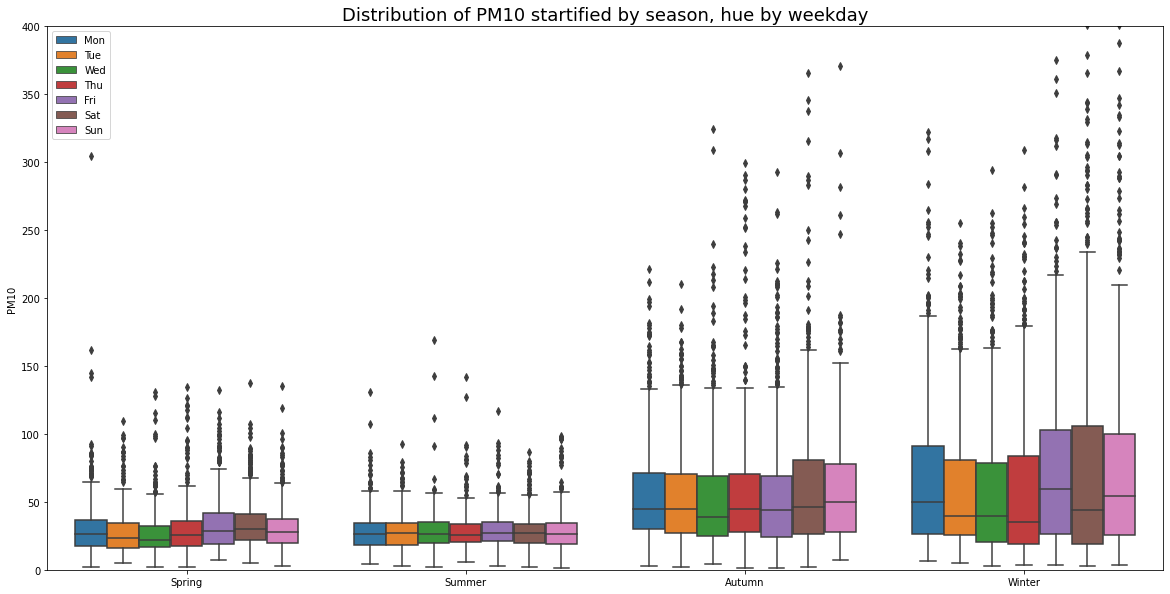

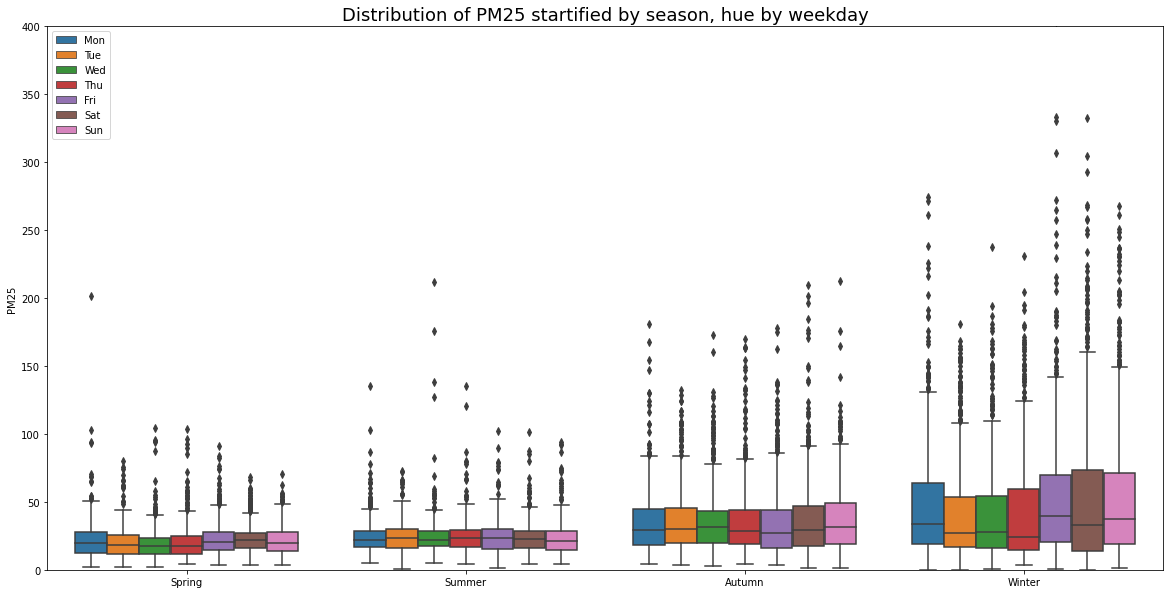

In [ ]:
for pollutant in pollutants:
  plt.figure(figsize=(20, 10))
  ax = sns.boxplot(x='season', y=pollutant, hue='weekday', data=df,
                   order=['Spring', 'Summer', 'Autumn', 'Winter'],
                   hue_order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
  ax.set(ylim=(0, 400), xlabel='')
  ax.set_title(f"Distribution of {pollutant} stratified by season, hue by weekday", fontsize=18)
  plt.legend(loc='upper left')
  plt.show()

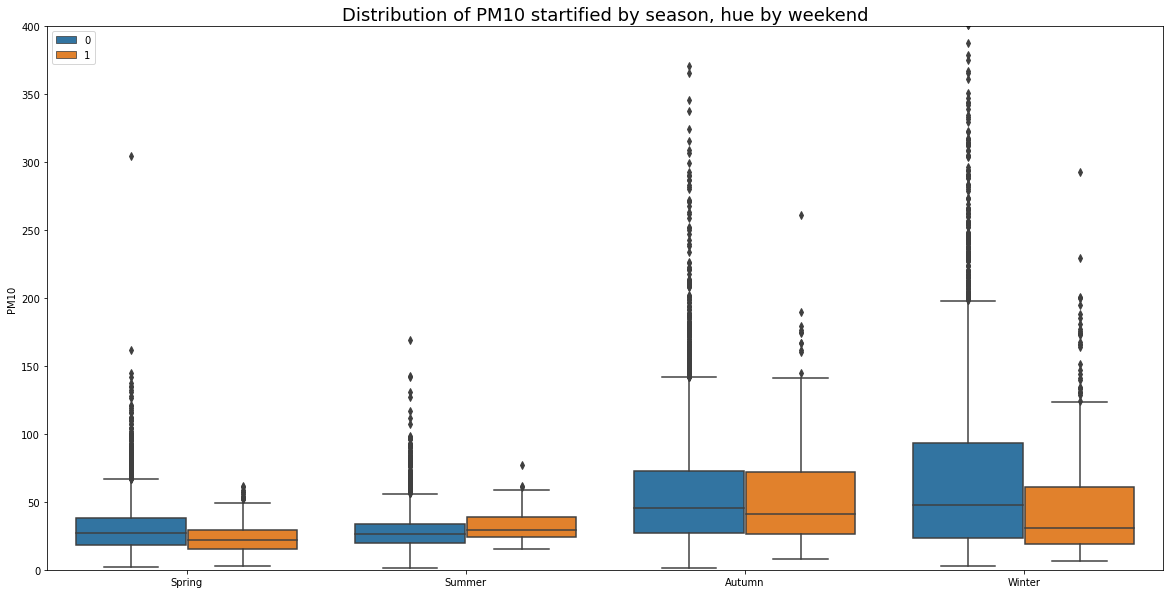

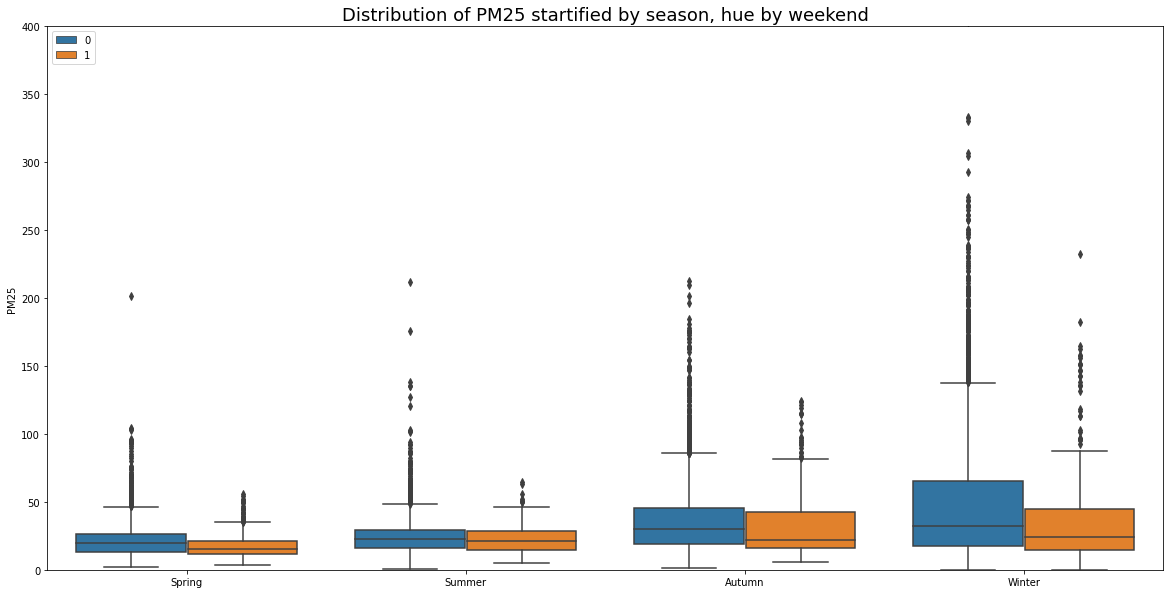

In [ ]:
for pollutant in pollutants:
  plt.figure(figsize=(20, 10))
  ax = sns.boxplot(x='season', y=pollutant, hue='weekend', data=df,
                   order=['Spring', 'Summer', 'Autumn', 'Winter'])
  ax.set(ylim=(0, 400), xlabel='')
  ax.set_title(f"Distribution of {pollutant} stratified by season, hue by weekend", fontsize=18)
  plt.legend(loc='upper left')
  plt.show()

We notice that during the winter season the pollution is lower at the weekend. There are no significant differences in the pollution whether it's weekend or not throughout the other seasons.

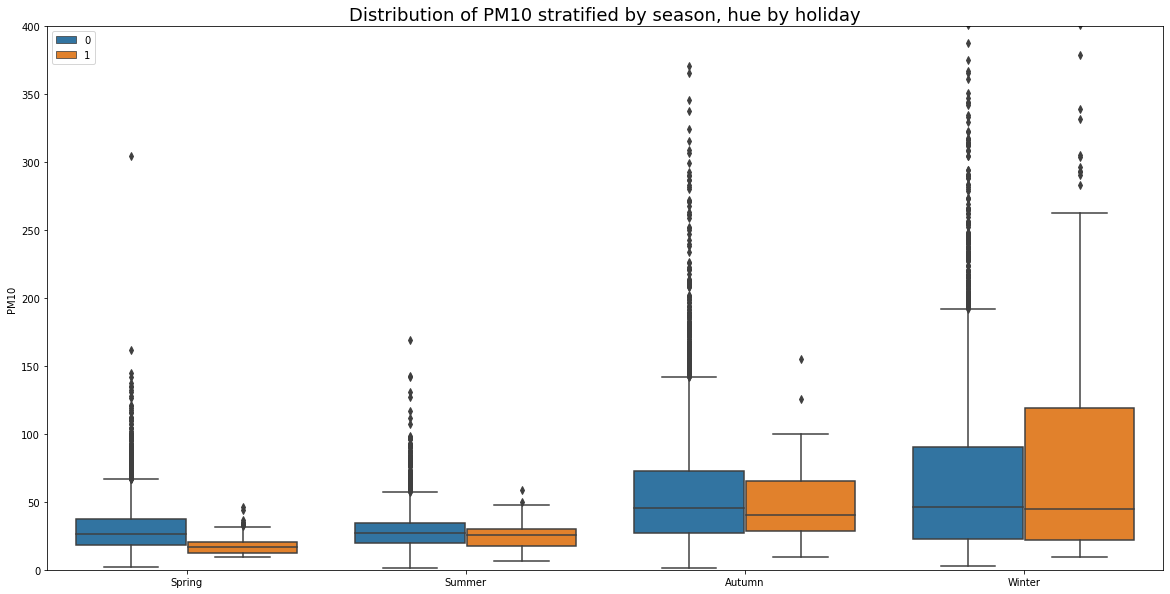

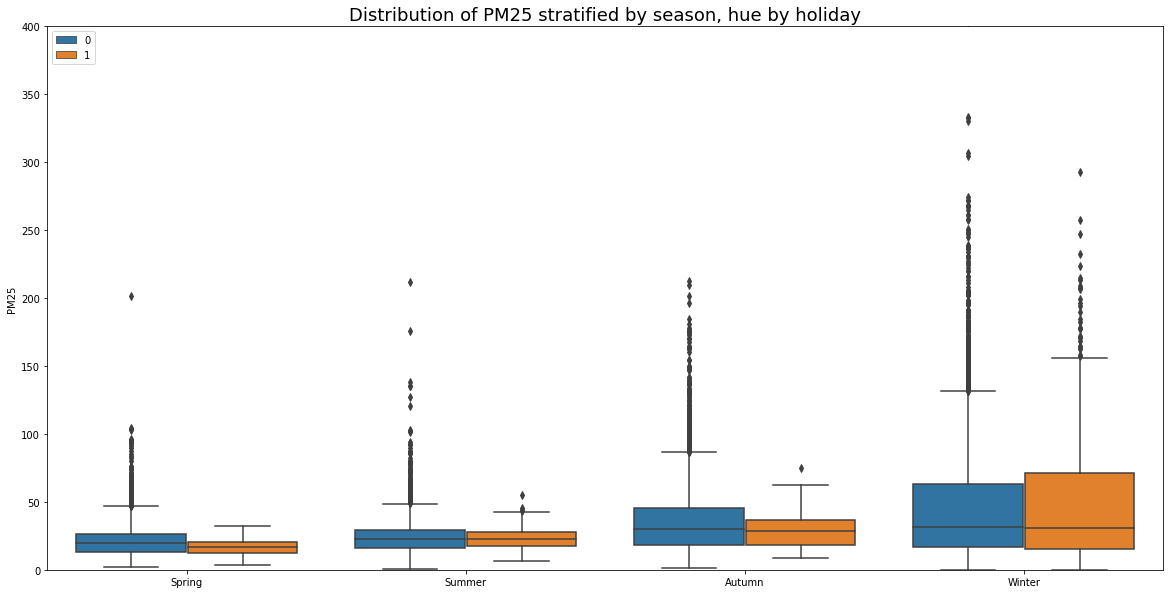

In [ ]:
for pollutant in pollutants:
  plt.figure(figsize=(20, 10))
  ax = sns.boxplot(x='season', y=pollutant, hue='holiday', data=df,
                   order=['Spring', 'Summer', 'Autumn', 'Winter'])
  ax.set(ylim=(0, 400), xlabel='')
  ax.set_title(f"Distribution of {pollutant} stratified by season, hue by holiday", fontsize=18)
  plt.legend(loc='upper left')
  plt.show()

64 holes for PM10
Durations for PM10: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 8, 8, 8, 10, 10, 11, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 15, 15, 16, 16, 17, 18, 32, 33, 33, 33, 34, 34, 35, 35, 36, 36, 207, 273, 278, 532, 1367]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


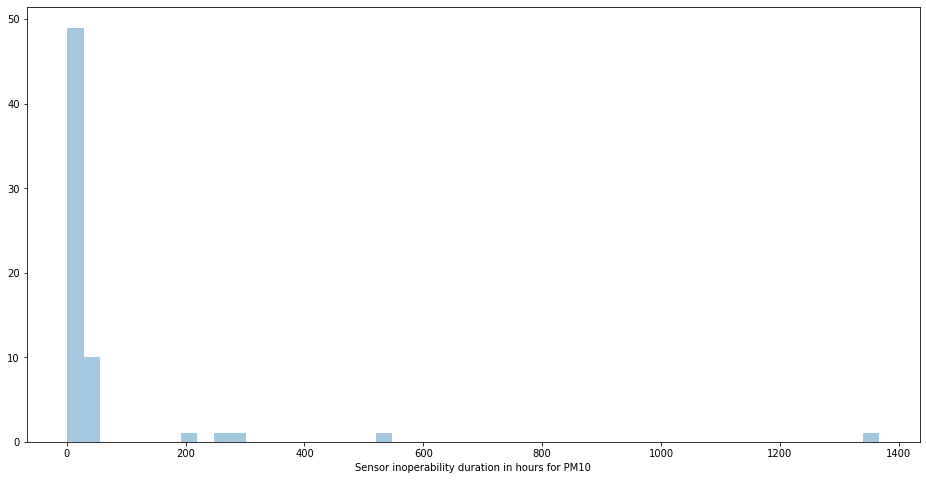

35 holes for PM25
Durations for PM25: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 32, 38, 533]


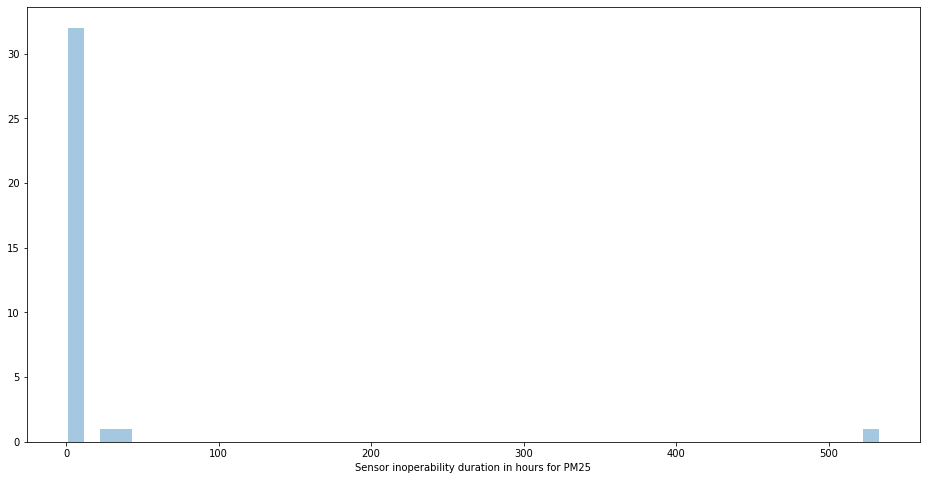

In [ ]:
for pollutant in pollutants:  
  df_nans = df[df[pollutant].isna()]
  durations = []
  period = timedelta(hours=1)

  for i, date in enumerate(df_nans.index):
    if i == 0:
      previous_date = date
      count = 1
    
    true_previous_date = date - period

    if true_previous_date == previous_date:
      count += 1
    
    else:
      durations.append(count)
      count = 1
    
    previous_date = date
    
  durations.append(count)
  durations.sort()
  print(len(durations), f'holes for {pollutant}')
  print(f'Durations for {pollutant}:', durations) 
  plt.figure(figsize=(16, 8))
  ax = sns.distplot(durations, bins=50, kde=False, axlabel=f'Sensor inoperability duration in hours for {pollutant}')
  plt.show()

There are in total 64 periods of inoperability for the PM10 sensor and 35 periods for the PM25 sensor, with a distribution of their duration plotted above. We can see that the duration of inoperability of the sensors is usually short.

**Inspecting the distribution of each variable**

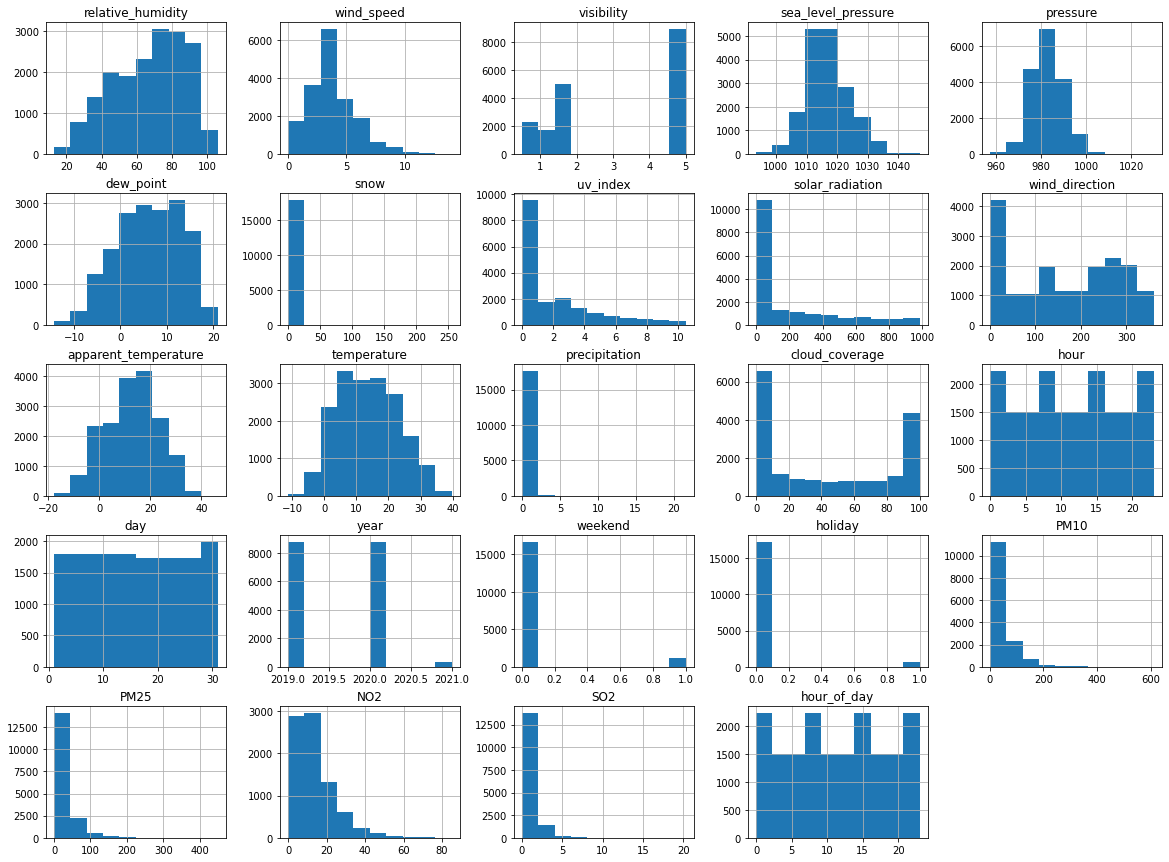

In [ ]:
ax = df.hist(figsize=(20, 15))

In [ ]:
df.columns

Index(['relative_humidity', 'wind_speed', 'visibility', 'sea_level_pressure',
       'pressure', 'dew_point', 'snow', 'uv_index', 'solar_radiation',
       'wind_direction', 'apparent_temperature', 'temperature',
       'precipitation', 'cloud_coverage', 'hour', 'day', 'month', 'year',
       'weekend', 'holiday', 'PM10', 'PM25', 'NO2', 'SO2', 'weekday',
       'hour_of_day', 'period_of_day', 'season'],
      dtype='object')

Index(['relative_humidity', 'wind_speed', 'visibility', 'sea_level_pressure',
       'pressure', 'dew_point', 'snow', 'uv_index', 'solar_radiation',
       'wind_direction', 'apparent_temperature', 'temperature',
       'precipitation', 'cloud_coverage'],
      dtype='object')


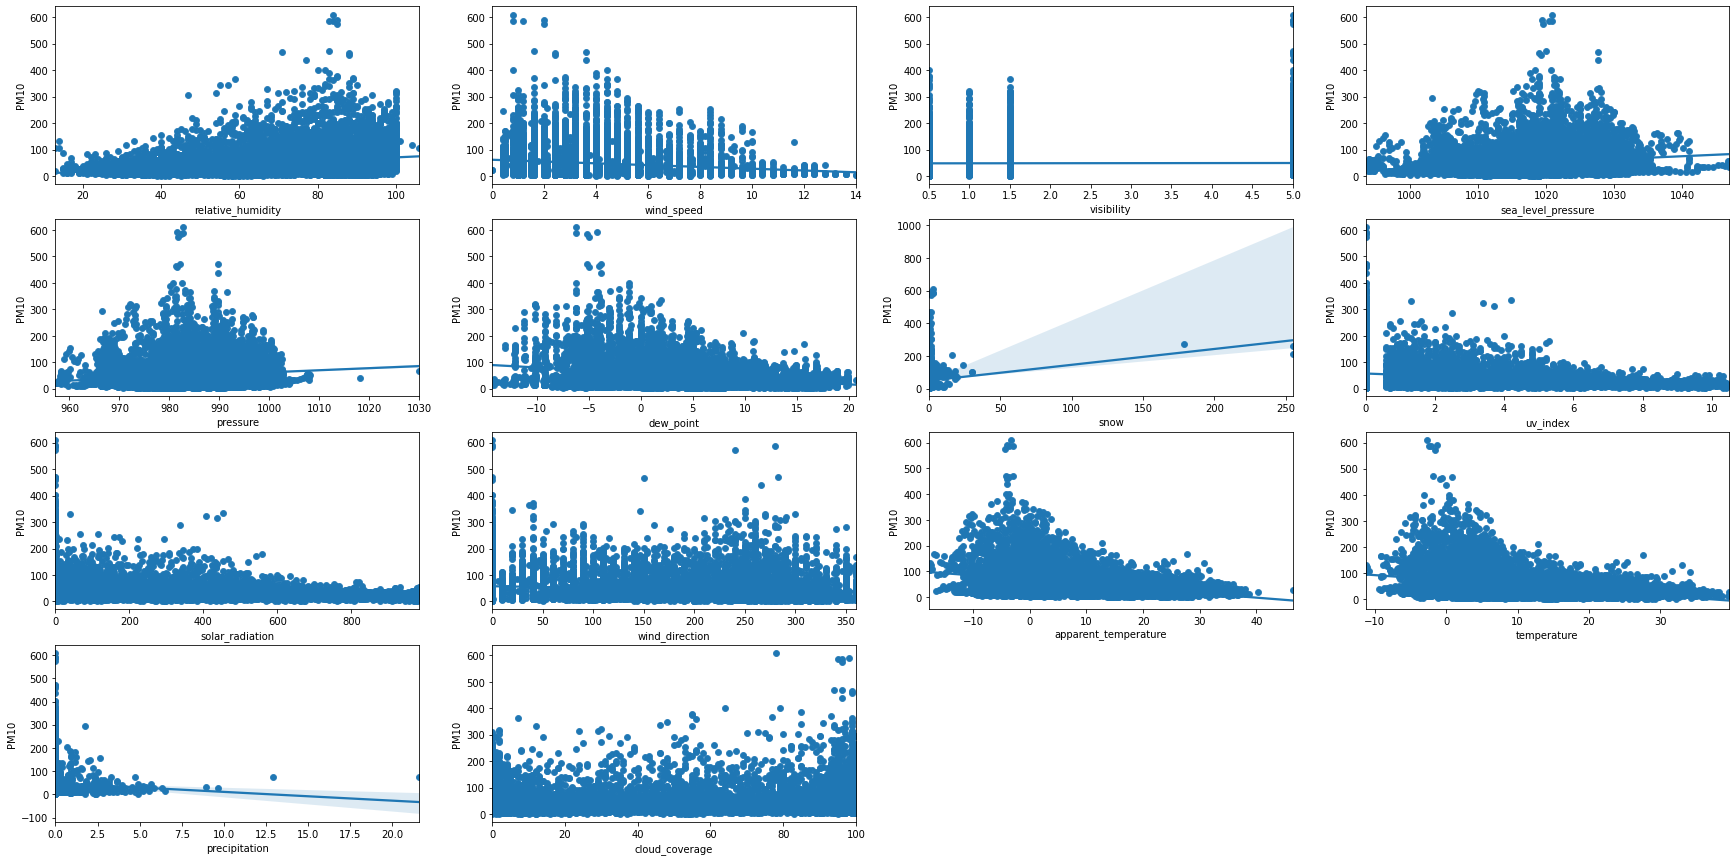

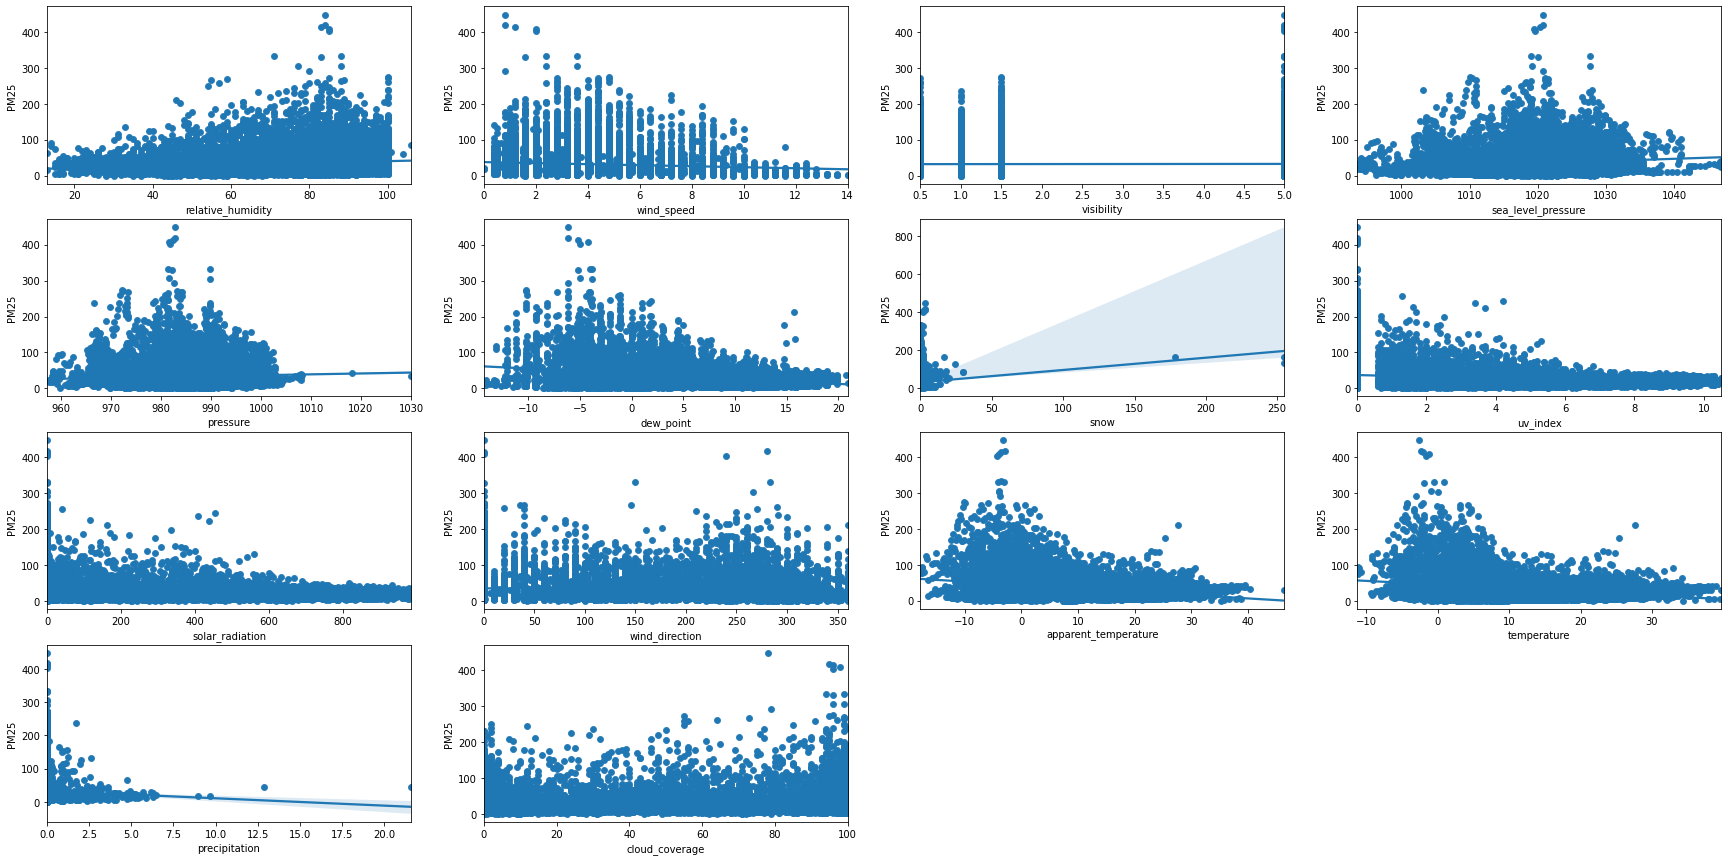

In [ ]:
feature_columns = df.columns[:14]
print(feature_columns)

for pollutant in pollutants:
  plt.figure(figsize=(30, 15))
  i=1
  for column in feature_columns:
      plt.subplot(4, 4, i)
      sns.scatterplot(x=df[column], y=df[pollutant]);
      sns.regplot(x=column, y=pollutant, data=df)
      i=i+1

  plt.show()

**Log transform pollutants**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


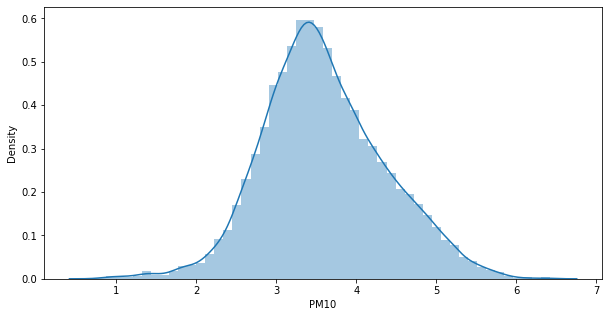

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


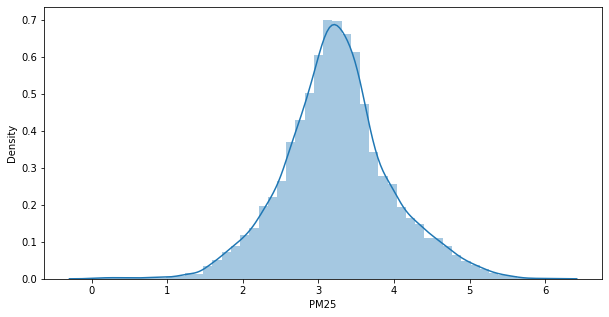

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


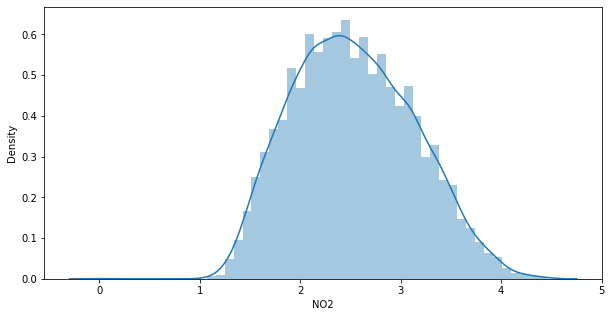

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


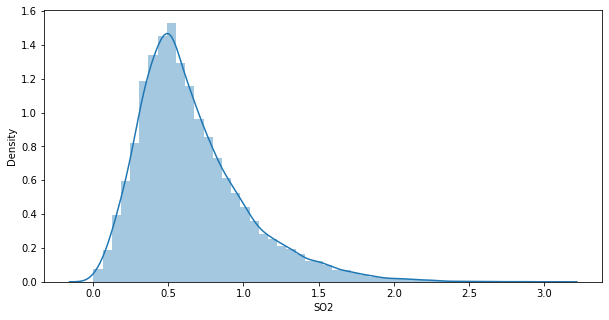

In [ ]:
skewed_features = ['PM10', 'PM25', 'NO2', 'SO2']
for feature in skewed_features:
  df[feature] = np.log(df[feature] + 1)
  plt.figure(figsize=(10, 5))
  sns.distplot(df[feature])
  plt.show()

Drop the duplicate values for the same hour if they exist, transform polutants' concentration in their log value and drop the correlated features. 

In [ ]:
skewed_features = ['PM10', 'PM25', 'CO', 'O3', 'SO2', 'NO2']
for station in stations:
  df = pd.read_csv(f'./combined_data/{station}.csv', index_col=0)
  df = df.loc[~df.index.duplicated(keep="first")]
  df.drop(['sea_level_pressure', 'apparent_temperature', 'uv_index', 'dew_point'], axis=1, inplace=True)
  for feature in skewed_features:
    if feature in df.columns:
      df[feature] = np.log(df[feature] + 1)
  df.to_csv(f'datasets/{station}.csv', index=True)